In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 20
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  #y = get_label(x, -1, -2, -3) # short distance, last 3 data points in the sequence
  y = get_label(x, 0, 1, 2) # long distance, first 3 data points in the sequence
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)


# Currently the pattern is changing in the last so SimpleRNN will do good.
# Shift the pattern to begining by y = get_label(x, 1, 2, 3), SimpleRNN fails to learn initially (initial epochs).
# To really judge the power of LSTM change the length T=20 and change the pattern at first 3 data points and monitor LSTM

Linear Model - Classification

In [3]:
# Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)

model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 4s 10ms/step - loss: 0.7891 - accuracy: 0.5092 - val_loss: 0.7083 - val_accuracy: 0.5236
Epoch 2/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6970 - accuracy: 0.5092 - val_loss: 0.6942 - val_accuracy: 0.4844
Epoch 3/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6936 - accuracy: 0.4996 - val_loss: 0.6940 - val_accuracy: 0.4900
Epoch 4/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6941 - accuracy: 0.5016 - val_loss: 0.6939 - val_accuracy: 0.5084
Epoch 5/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6941 - accuracy: 0.4976 - val_loss: 0.6946 - val_accuracy: 0.4700
Epoch 6/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6947 - accuracy: 0.5044 - val_loss: 0.6944 - val_accuracy: 0.4948
Epoch 7/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6934 - accuracy: 0.4876 - val_loss: 0.6954 - val_accuracy: 0.5124
Epoch 8/100


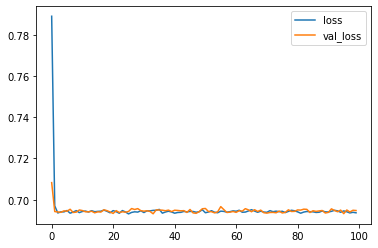

In [4]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

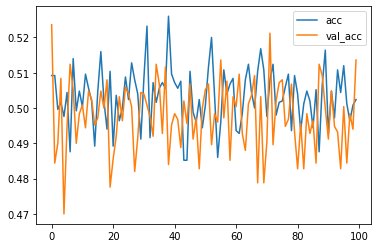

In [5]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

Simple RNN classification

Epoch 1/100
79/79 [==============================] - 3s 20ms/step - loss: 0.7034 - accuracy: 0.5072 - val_loss: 0.6971 - val_accuracy: 0.4980
Epoch 2/100
79/79 [==============================] - 1s 18ms/step - loss: 0.6939 - accuracy: 0.5120 - val_loss: 0.6912 - val_accuracy: 0.4804
Epoch 3/100
79/79 [==============================] - 1s 17ms/step - loss: 0.6890 - accuracy: 0.5228 - val_loss: 0.6871 - val_accuracy: 0.5344
Epoch 4/100
79/79 [==============================] - 1s 18ms/step - loss: 0.6846 - accuracy: 0.5484 - val_loss: 0.6815 - val_accuracy: 0.5800
Epoch 5/100
79/79 [==============================] - 1s 18ms/step - loss: 0.6735 - accuracy: 0.5928 - val_loss: 0.6681 - val_accuracy: 0.6004
Epoch 6/100
79/79 [==============================] - 1s 18ms/step - loss: 0.6610 - accuracy: 0.6196 - val_loss: 0.6567 - val_accuracy: 0.6160
Epoch 7/100
79/79 [==============================] - 1s 17ms/step - loss: 0.6534 - accuracy: 0.6384 - val_loss: 0.6443 - val_accuracy: 0.6412
Epoch 

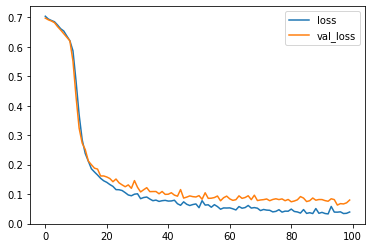

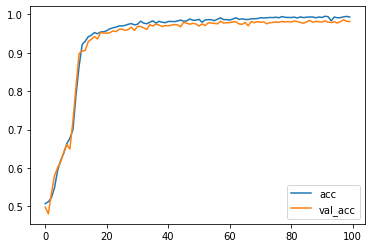

In [6]:
# We will try different RNN Models
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(learning_rate=0.01),
  # optimizer=SGD(learning_rate=0.1, momentum=0.9),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

LSTM classification

Epoch 1/400
79/79 [==============================] - 3s 17ms/step - loss: 0.6964 - accuracy: 0.5008 - val_loss: 0.6950 - val_accuracy: 0.4964
Epoch 2/400
79/79 [==============================] - 1s 11ms/step - loss: 0.6947 - accuracy: 0.4964 - val_loss: 0.6941 - val_accuracy: 0.4956
Epoch 3/400
79/79 [==============================] - 1s 11ms/step - loss: 0.6933 - accuracy: 0.5028 - val_loss: 0.6947 - val_accuracy: 0.5024
Epoch 4/400
79/79 [==============================] - 1s 11ms/step - loss: 0.6928 - accuracy: 0.5128 - val_loss: 0.6944 - val_accuracy: 0.4960
Epoch 5/400
79/79 [==============================] - 1s 11ms/step - loss: 0.6925 - accuracy: 0.5248 - val_loss: 0.6946 - val_accuracy: 0.4900
Epoch 6/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6922 - accuracy: 0.5116 - val_loss: 0.6950 - val_accuracy: 0.5108
Epoch 7/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6924 - accuracy: 0.5084 - val_loss: 0.6953 - val_accuracy: 0.4884
Epoch 

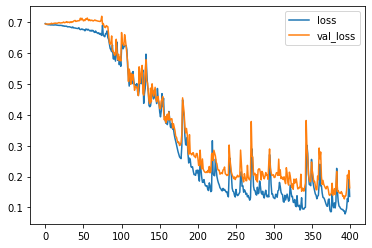

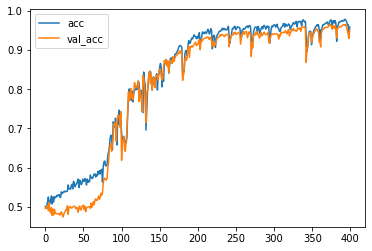

In [15]:
# We will try different RNN Models
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

# method 2
#x = LSTM(5, return_sequences=True)(i)
#x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(learning_rate=0.01),
  # optimizer=SGD(learning_rate=0.1, momentum=0.9),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

LSTM with GlobalMaxPooling

Epoch 1/100
79/79 [==============================] - 3s 18ms/step - loss: 0.6942 - accuracy: 0.4972 - val_loss: 0.6930 - val_accuracy: 0.5076
Epoch 2/100
79/79 [==============================] - 1s 11ms/step - loss: 0.6935 - accuracy: 0.5040 - val_loss: 0.6924 - val_accuracy: 0.5068
Epoch 3/100
79/79 [==============================] - 1s 11ms/step - loss: 0.6931 - accuracy: 0.5100 - val_loss: 0.6919 - val_accuracy: 0.5324
Epoch 4/100
79/79 [==============================] - 1s 11ms/step - loss: 0.6925 - accuracy: 0.5300 - val_loss: 0.6913 - val_accuracy: 0.5304
Epoch 5/100
79/79 [==============================] - 1s 11ms/step - loss: 0.6916 - accuracy: 0.5332 - val_loss: 0.6930 - val_accuracy: 0.5148
Epoch 6/100
79/79 [==============================] - 1s 11ms/step - loss: 0.6902 - accuracy: 0.5304 - val_loss: 0.6862 - val_accuracy: 0.5440
Epoch 7/100
79/79 [==============================] - 1s 11ms/step - loss: 0.6715 - accuracy: 0.5692 - val_loss: 0.6487 - val_accuracy: 0.6108
Epoch 

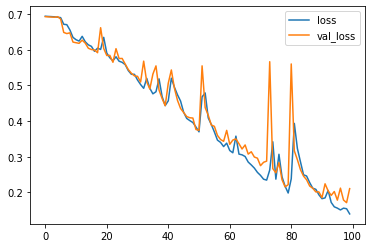

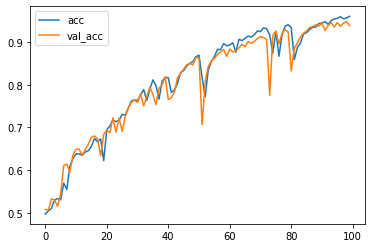

In [12]:
# We will try different RNN Models
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
#x = LSTM(5)(i)

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(learning_rate=0.01),
  # optimizer=SGD(learning_rate=0.1, momentum=0.9),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

GRU classification

Epoch 1/100
79/79 [==============================] - 4s 16ms/step - loss: 0.6940 - accuracy: 0.5092 - val_loss: 0.6964 - val_accuracy: 0.4944
Epoch 2/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6934 - accuracy: 0.5088 - val_loss: 0.6958 - val_accuracy: 0.4968
Epoch 3/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6926 - accuracy: 0.5188 - val_loss: 0.6949 - val_accuracy: 0.4952
Epoch 4/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6929 - accuracy: 0.5204 - val_loss: 0.6984 - val_accuracy: 0.5060
Epoch 5/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6929 - accuracy: 0.5056 - val_loss: 0.6956 - val_accuracy: 0.4948
Epoch 6/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.5100 - val_loss: 0.6966 - val_accuracy: 0.4900
Epoch 7/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6920 - accuracy: 0.5152 - val_loss: 0.6953 - val_accuracy: 0.4808
Epoch 

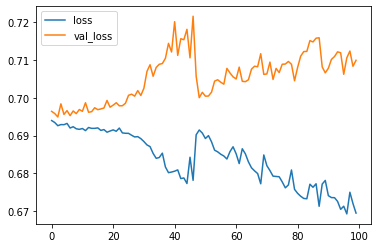

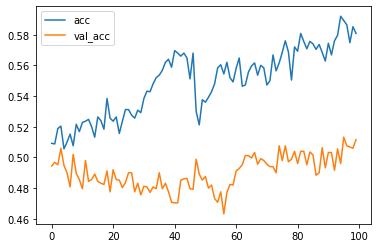

In [13]:
# We will try different RNN Models
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

# method 2
#x = LSTM(5, return_sequences=True)(i)
#x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(learning_rate=0.01),
  # optimizer=SGD(learning_rate=0.1, momentum=0.9),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()